In [1]:
%matplotlib inline

In [2]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

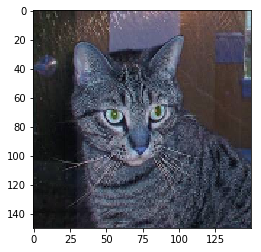

(150, 150, 3)


In [3]:

img = cv2.imread('train/cat.1.jpg') 
img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
plt.imshow(img, interpolation='nearest')
plt.show()
print(img.shape)

In [4]:
# Train data
# is will map the index => class
# 0 for cat, 1 for dog
def prepare_train_data():
    y = []
    train = []
    print("Starting Cat data import...")
    for i in range(100):
        cat = cv2.imread('train/cat.'+str(i)+'.jpg') 
        cat = cv2.resize(cat, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        train.append(cat)
        y.append(0)
    print("Starting Dog data import...")
    for i in range(100):
        dog = cv2.imread('train/dog.'+str(i)+'.jpg') 
        dog = cv2.resize(dog, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        train.append(dog)
        y.append(1)
    X_train = np.array(train) 
    # Reshape X_train from 4d to 2d
    nsamples, nx, ny, nz = X_train.shape
    X_train = X_train.reshape((nsamples,nx*ny*nz))
    y_train = np.asarray(y)
    return (X_train,y_train)
X,y = prepare_train_data()


Starting Cat data import...
Starting Dog data import...


In [5]:
print("X shape",X.shape)
print("y shape:",y.shape)

X shape (200, 67500)
y shape: (200,)


In [6]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=10000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)

In [7]:
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
print("Training model...")
clf1 = train_model(X_train,y_train,[20,20],optimizer)
print("Scoring model...")
print("Score", clf1.score(X_test,y_test))

Training model...
Scoring model...
Score 0.4125


In [8]:
def prepare_test():
    test = []
    for i in range(1,11+1):
        img = cv2.imread('test1/'+str(i)+'.jpg') 
        img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
        test.append(img)
    X_test = np.array(test) 
    # Reshape X_train from 4d to 2d
    nsamples, nx, ny, nz = X_test.shape
    X_test = X_test.reshape((nsamples,nx*ny*nz))
    return X_test

In [9]:
X_test_data = prepare_test()
X_test_data.shape

(11, 67500)

In [10]:
clf1.predict(X_test_data)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])